# Malware Classification with CNN

This notebook aims to build a **Convolutional Neural Network** model to perform a **Multiclass classification** of Malwares from the **Malimg Dataset**. This dataset directly comes from the paper **Malware Images: Visualization and Automatic Classification** from L. Nataraj, S. Karthikeyan, G. Jacob and B. S. Manjunath.
My goal is to give a full tutorial on how to implement their solution, from the preprocessing of malwares to the inference part.

# Data : 
A Malware can belong to one of the following class : 
 * Adialer.C
 * Agent.FYI
 * Allaple.A
 * Allaple.L
 * Alueron.gen!J
 * Autorun.K
 * C2LOP.P
 * C2LOP.gen!g
 * Dialplatform.B
 * Dontovo.A
 * Fakerean
 * Instantaccess
 * Lolyda.AA1
 * Lolyda.AA2
 * Lolyda.AA3
 * Lolyda.AT
 * Malex.gen!J
 * Obfuscator.AD
 * Rbot!gen
 * Skintrim.N
 * Swizzor.gen!E
 * Swizzor.gen!I
 * VB.AT
 * Wintrim.BX
 * Yuner.A

# Preprocessing - Converting to images

As the **Malimg dataset** already contains images of malwares, I will use another dataset to first show you how to convert our malwares into images, which can be tricky. 
I took as example files from this [dataset](https://www.kaggle.com/c/malware-classification/data?select=train.7z). For each file, the raw data contains the hexadecimal representation of the file's binary content. The goal is to convert those files into PNG images.

Raw malwares will be stored in the following folder:

In [1]:
root = "dataRaw"

The following function allows us to convert our hexadecimal **.bytes** files stored into our 'data' folder, into PNG images.

In [2]:
import sys
import os
from math import log
import numpy as np
import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# This function allows us to process our hexadecimal files
# into png images##
def convertAndSave(array,name):
    print('Processing '+name)
    if array.shape[1]!=16: #If not hexadecimal
        assert(False)
    b=int((array.shape[0]*16)**(0.5))
    b=2**(int(log(b)/log(2))+1)
    a=int(array.shape[0]*16/b)
    array=array[:a*b//16,:]
    array=np.reshape(array,(a,b))
    print(array.shape)
    im = Image.fromarray(np.uint8(array))
    im.save(root+'\\'+name+'.png', "PNG")
    return im

files :  ['.ipynb_checkpoints', '0A32eTdBKayjCWhZqDOQ.bytes', '0A32eTdBKayjCWhZqDOQ.bytes.png', '0ACDbR5M3ZhBJajygTuf.bytes', '0ACDbR5M3ZhBJajygTuf.bytes.png']
(75104, 16) 
 [[ 86 141  68 ... 199   6   8]
 [187  66   0 ... 204 204 204]
 [199   1   8 ... 204 204 204]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Processing 0A32eTdBKayjCWhZqDOQ.bytes
(586, 2048)
(98816, 16) 
 [[  0   0 128 ...  32   4  32]
 [  0   0  32 ...  10  33   1]
 [ 64   0   2 ...  64 200  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Processing 0ACDbR5M3ZhBJajygTuf.bytes
(772, 2048)


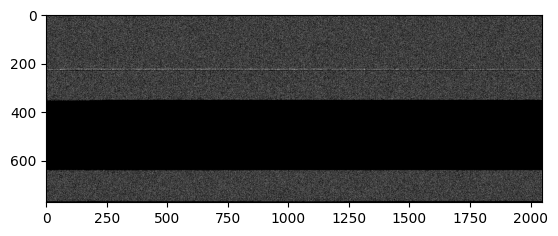

In [4]:
# Get the list of files
files=os.listdir(root)
print('files : ',files)
#We will process files one by one.
for counter, name in enumerate(files):
        #We only process .bytes files from our folder.
        if '.bytes' != name[-6:]:
            continue
        f=open(root+'/'+name)
        array=[]
        for line in f:
            xx=line.split()
            if len(xx)!=17:
                continue
            array.append([int(i,16) if i!='??' else 0 for i in xx[1:] ])

        np_array = np.array(array)
        print(np_array.shape, '\n', np_array)
       
        plt.imshow(convertAndSave(np_array,name), cmap='gray')
        del array
        f.close()

Thanks to this method you are able to create your own malware images dataset !

For computation time I will not process the entire dataset and I will now focus on the **Malming dataset** in which Malwares are already set to images.

Moreover, each Malware image is set into the subfolder corresponding to its class. Thus, when creating your own training images dataset, don't forget to gather Malwares by class into subfolder before executing the next step.

# Preprocessing - Generate the dataset

Here is our new folder :

In [5]:
path_root = "malimg_dataset\\"

To be able to use our images for training and testing, lets use **ImageDataGenerator.flow_from_directory()** which generates batches of normalized tensor image data from the respective data directories.
  * **target_size** : Will resize all images to the specified size. I personally chose (64*64) images.
  * **batch_size** : Is the size of the batch we will use. In our case, we only have 9339 images, hence setting a batch_size above this won't change anything.

In [6]:
from keras.preprocessing.image import ImageDataGenerator
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(64,64), batch_size=10000)

Found 9340 images belonging to 25 classes.


In [7]:
type(batches)

keras.preprocessing.image.DirectoryIterator

In [8]:
dir(batches)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_filepaths',
 '_flow_index',
 '_get_batches_of_transformed_samples',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_set_index_array',
 'allowed_class_modes',
 'batch_index',
 'batch_size',
 'class_indices',
 'class_mode',
 'classes',
 'color_mode',
 'data_format',
 'directory',
 'dtype',
 'filenames',
 'filepaths',
 'image_data_generator',
 'image_shape',
 'index_array',
 'index_generator',
 'interpolation',
 'labels',
 'lock',
 'n',
 'next',
 'num_classes',
 'on_epoch_end',
 'reset',
 'sample_weight',
 'samples',
 'save_format',
 'save_prefix',
 'save_to_dir',
 'see

We can see that our 25 classes have been well recognized (thanks to our subfolders). Let's clarify this using the dictionnary.

In [9]:
batches.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

**batches** generated with ImageDataGenerator() is an iterator. Hence, we use next() to go through all its elements and generate a batch of images and labels from the data set.

In [10]:
imgs, labels = next(batches)

As you can see, our images are in RGB with shape 64x64 [width x length x depth].

In [11]:
imgs.shape

(9340, 64, 64, 3)

**labels** has the shape (batch_size, number of classes).

In [12]:
labels.shape

(9340, 25)

In [13]:
print(imgs.shape[-1])

3


In [14]:
list_ = list(batches.class_indices.keys())
print(list_, '\n')

for i in range(0,10):
    print(labels[i], list_[np.argmax(labels[i])])

['Adialer.C', 'Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J', 'Autorun.K', 'C2LOP.P', 'C2LOP.gen!g', 'Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3', 'Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen', 'Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A'] 

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.] Alueron.gen!J
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.] Alueron.gen!J
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.] Alueron.gen!J
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.] Allaple.L
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.] Allaple.A
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.] Dialplatform.B
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.] Allaple.L
[0. 0. 1. 0. 0.

The following method allows us to plot a sample of images in our dataset.

In [15]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0, 60):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(batches.class_indices.keys())[np.argmax(titles[i])], 
                                                             fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

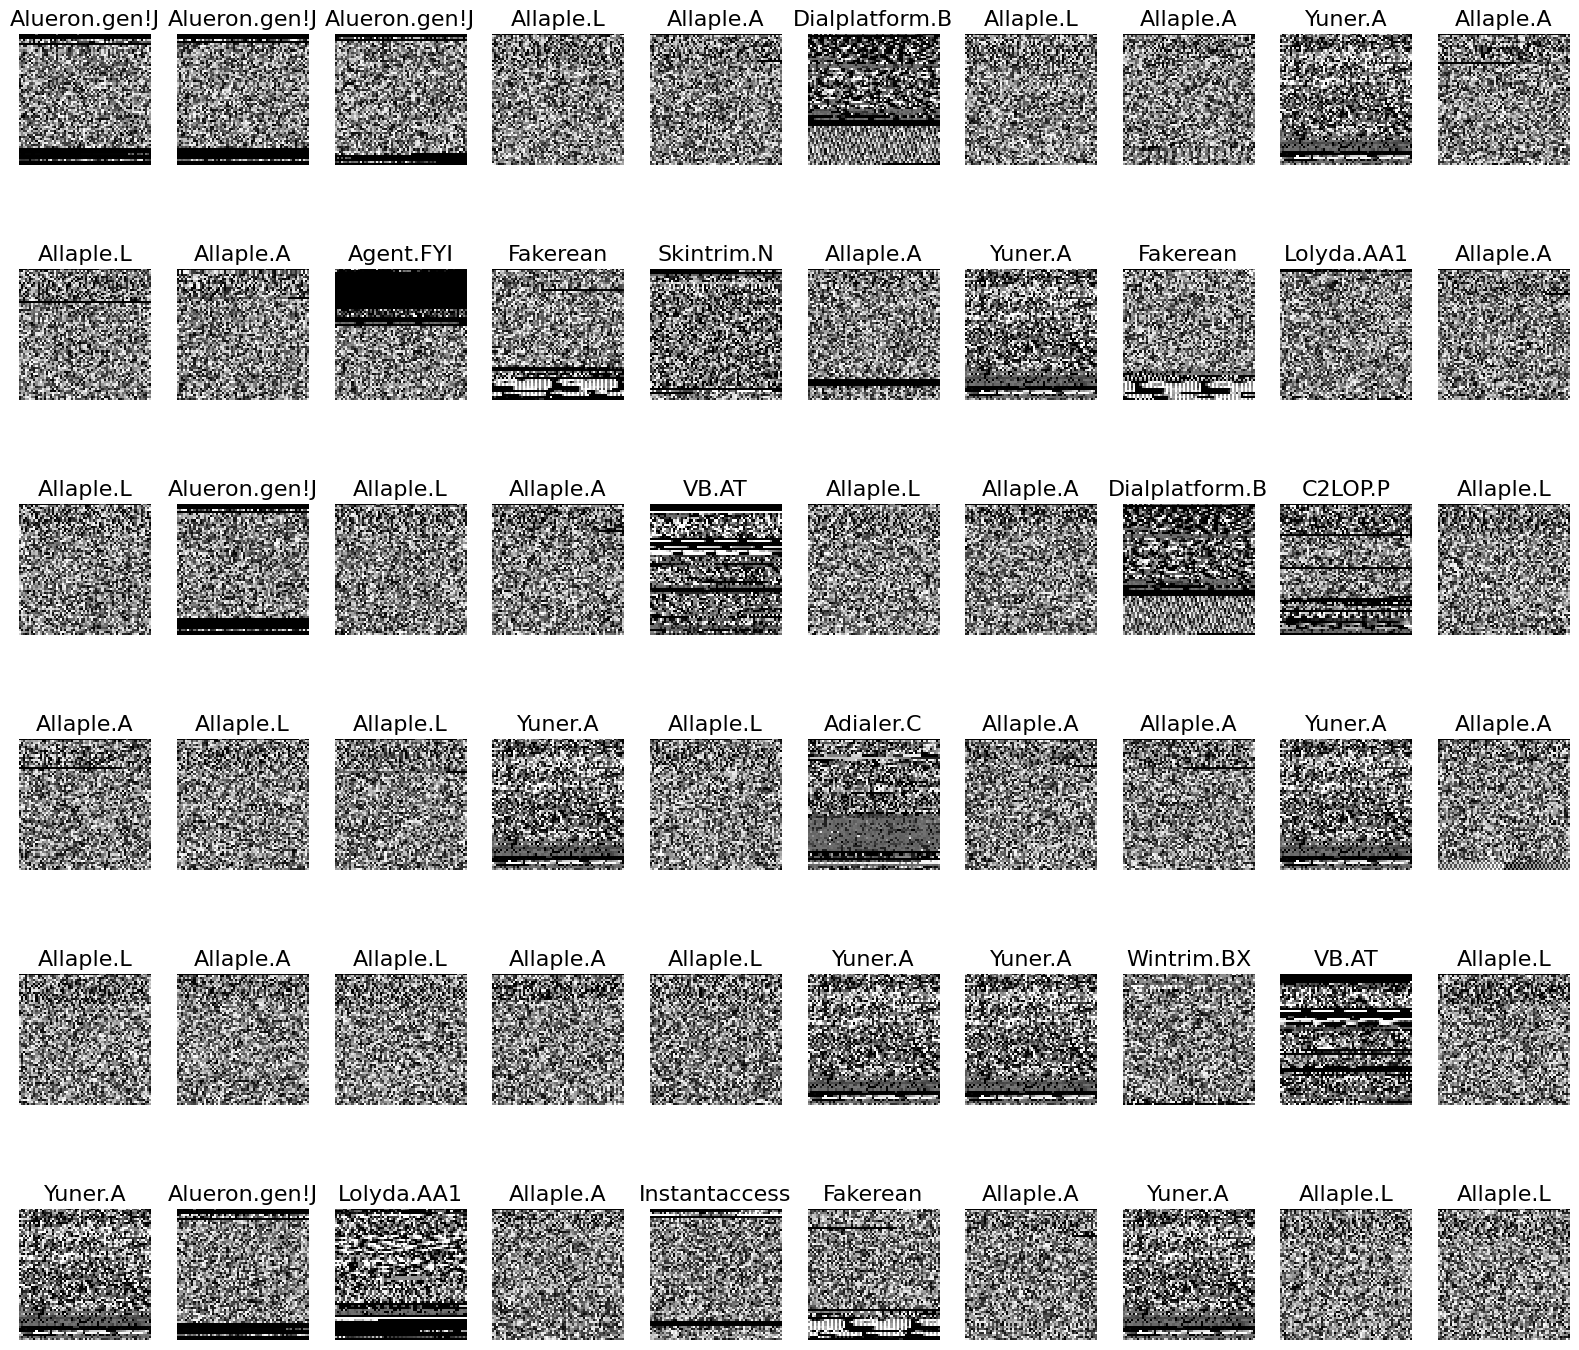

In [16]:
plots(imgs, titles = labels)

We can already observe differences between classes.

# Analyse 

All our images are finally ready to be used. Lets check out the repartition of data between classes :

In [17]:
classes = batches.class_indices.keys()

In [18]:
perc = (sum(labels)/labels.shape[0])*100

In [19]:
print(sum(labels))
print(labels.shape[0])

[ 122.  116. 2949. 1591.  198.  106.  146.  200.  177.  162.  381.  431.
  213.  184.  123.  159.  136.  142.  158.   80.  128.  132.  408.   97.
  801.]
9340


In [20]:
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

<BarContainer object of 25 artists>

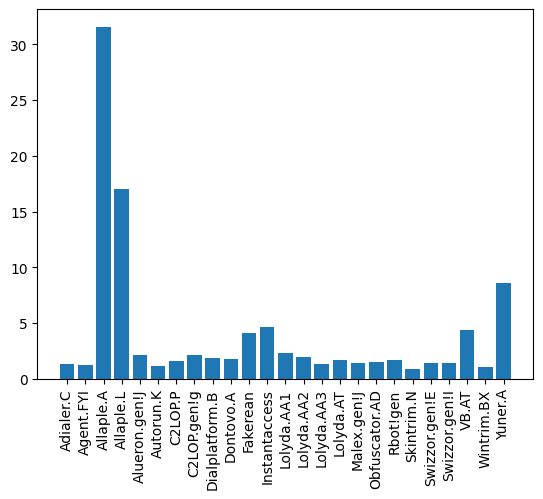

In [21]:
plt.xticks(rotation='vertical')
plt.bar(classes, perc)

We can see that our dataset is quite unbalanced : a lot of Malwares belong to class 2 : **Allaple.A** and class 3 : **Allaple.L** !
We will need to deal with that later. 

# Train and test

Lets split our model into train and test following a ratio 70% train - 30% test ratio.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

In [23]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(6538, 64, 64, 3) (2802, 64, 64, 3)
(6538, 25) (2802, 25)


## Convolutional Neural Network Model

We will now build our **CNN** model using Keras. This model will have the following layers :

* **Convolutional Layer** : 30 filters, (3 * 3) kernel size
* **Max Pooling Layer** : (2 * 2) pool size
* **Convolutional Layer** : 15 filters, (3 * 3) kernel size
* **Max Pooling Layer** : (2 * 2) pool size
* **DropOut Layer** : Dropping 25% of neurons.
* **Flatten Layer**
* **Dense/Fully Connected Layer** : 128 Neurons, Relu activation function
* **DropOut Layer** : Dropping 50% of neurons.
* **Dense/Fully Connected Layer** : 50 Neurons, Softmax activation function
* **Dense/Fully Connected Layer** : num_class Neurons, Softmax activation function

**Input shape** : 64 * 64 * 3

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [25]:
# gpu 확인
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5557134486994761004
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6271991808
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3055314981001603537
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2070 Super with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [26]:
# GPU 사용
gpus = tf.config.experimental.list_physical_devices('GPU')
#gpus = tf.config.list_physical_devices('GPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


We want **25** classes as output.

In [27]:
num_classes = 25

Building the model

In [28]:
def malware_model():
    Malware_model = Sequential()
    Malware_model.add(Conv2D(30, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(64,64,3)))

    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(15, (3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(128, activation='relu'))
    Malware_model.add(Dropout(0.5))
    Malware_model.add(Dense(50, activation='relu'))
    Malware_model.add(Dense(num_classes, activation='softmax'))
    Malware_model.compile(loss='categorical_crossentropy', 
                              optimizer = 'adam', metrics=['accuracy'])
    return Malware_model

In [29]:
Malware_model = malware_model()
Malware_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 30)        840       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 15)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 15)        0         
                                                                 
 flatten (Flatten)           (None, 2940)              0

#### Unbalanced data

Several methods are available to deal with unbalanced data. I our case, I chose to give higher weight to minority class and lower weight to majority class. 

**class_weights** uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data. To use this method, y_train must not be one hot encoded.

In [30]:
y_train.shape

(6538, 25)

**class_weight** function cannot deal with one hot encoded y. We need to convert it.

In [31]:
y_train_new = np.argmax(y_train, axis=1)
y_train_new

array([16, 12, 21, ..., 24,  2, 24], dtype=int64)

In [32]:
print(y_train)
print(np.unique(y_train))

print(y_train_new)
print(np.unique(y_train_new))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[0. 1.]
[16 12 21 ... 24  2 24]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


In [33]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced', 
                                                  classes=np.unique(y_train_new), 
                                                  y=y_train_new)

class_weight_dict = dict(enumerate(class_weights))

print(class_weights, '\n')
print(class_weight_dict)

[2.78212766 3.04093023 0.12870079 0.23796178 1.95164179 3.84588235
 2.56392157 1.80358621 2.043125   2.27408696 0.95098182 0.86310231
 1.72052632 2.043125   2.90577778 2.10903226 2.78212766 2.56392157
 2.46716981 5.02923077 2.87384615 2.93842697 0.92084507 3.58246575
 0.4572028 ] 

{0: 2.782127659574468, 1: 3.0409302325581393, 2: 0.1287007874015748, 3: 0.23796178343949045, 4: 1.951641791044776, 5: 3.8458823529411763, 6: 2.563921568627451, 7: 1.8035862068965518, 8: 2.043125, 9: 2.274086956521739, 10: 0.9509818181818182, 11: 0.8631023102310231, 12: 1.7205263157894737, 13: 2.043125, 14: 2.905777777777778, 15: 2.109032258064516, 16: 2.782127659574468, 17: 2.563921568627451, 18: 2.4671698113207547, 19: 5.029230769230769, 20: 2.873846153846154, 21: 2.938426966292135, 22: 0.9208450704225352, 23: 3.5824657534246573, 24: 0.4572027972027972}


<BarContainer object of 25 artists>

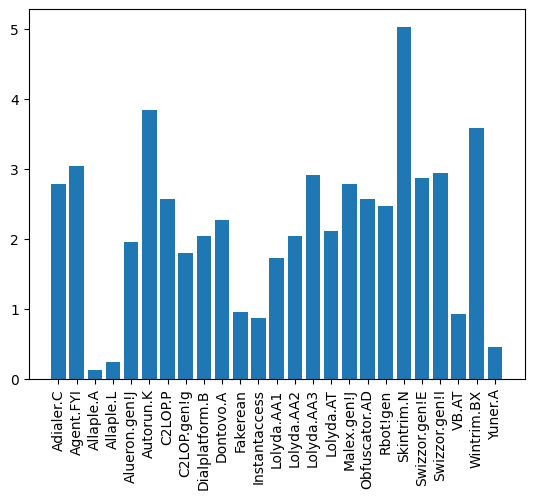

In [34]:
plt.xticks(rotation='vertical')
plt.bar(classes, class_weights)

In [35]:
Malware_model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [36]:
epochs=50
history = Malware_model.fit(X_train, y_train, validation_split=0.3, epochs=epochs, class_weight=class_weight_dict)

Epoch 1/50
143/143 [==============================] - 6s 9ms/step - loss: 2.5608 - accuracy: 0.2159 - val_loss: 1.3764 - val_accuracy: 0.6493
Epoch 2/50
143/143 [==============================] - 1s 7ms/step - loss: 1.1637 - accuracy: 0.4958 - val_loss: 0.9155 - val_accuracy: 0.6422
Epoch 3/50
143/143 [==============================] - 1s 7ms/step - loss: 0.8039 - accuracy: 0.5334 - val_loss: 0.6883 - val_accuracy: 0.7650
Epoch 4/50
143/143 [==============================] - 1s 8ms/step - loss: 0.6591 - accuracy: 0.5819 - val_loss: 0.5857 - val_accuracy: 0.7813
Epoch 5/50
143/143 [==============================] - 1s 7ms/step - loss: 0.5456 - accuracy: 0.6355 - val_loss: 0.5354 - val_accuracy: 0.7136
Epoch 6/50
143/143 [==============================] - 1s 7ms/step - loss: 0.4765 - accuracy: 0.6643 - val_loss: 0.4966 - val_accuracy: 0.8078
Epoch 7/50
143/143 [==============================] - 1s 7ms/step - loss: 0.4342 - accuracy: 0.6860 - val_loss: 0.4603 - val_accuracy: 0.8058
Epoch 

In [37]:
scores = Malware_model.evaluate(X_test, y_test)

88/88 [==============================] - 0s 4ms/step - loss: 0.2246 - accuracy: 0.8869


In [38]:
print('Final CNN accuracy: ', scores[1])

Final CNN accuracy:  0.8868665099143982


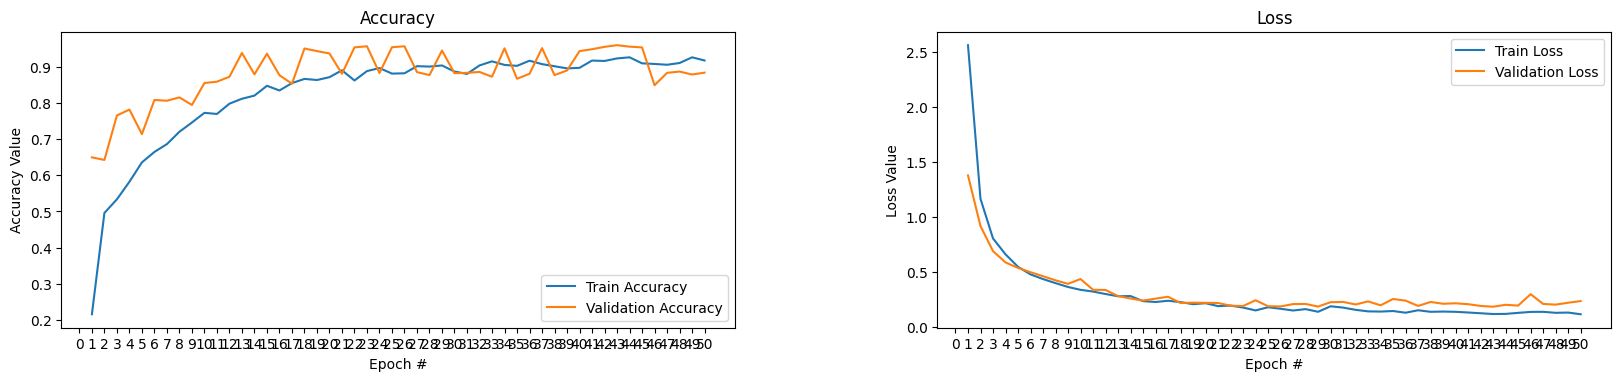

In [39]:
%matplotlib inline

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,epochs+1))

ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, epochs+1, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch #')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, epochs+1, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch #')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# Confusion Matrix

Lets analyse our results.

In [40]:
import numpy as np
import pandas as pd

In [41]:
y_pred = Malware_model.predict(X_test, verbose=0)
y_pred_new = np.argmax(y_pred, axis=1)
print(y_pred_new)

y_test_new = np.argmax(y_test, axis=1)
print(y_test_new)

[ 2 10  3 ...  5 20  3]
[ 2 10  3 ... 24 21  3]


In [42]:
y_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [43]:
print(y_pred_new)
print(y_test_new)

[ 2 10  3 ...  5 20  3]
[ 2 10  3 ... 24 21  3]


In [44]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test_new, y_pred_new)
print(c_matrix)

[[ 28   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0  30   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0 911   5   0   0   0   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0]
 [  0   0   5 484   0   0   0   0   0   0   0   0   0   0   0   0   3   0
    0   0   0   0   0   0   0]
 [  0   0   0   0  63   0   0   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0  38   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   1   1   0   0  23  11   0   0   0   0   0   0   0   0   1   0
    0   0   5   2   0   0   0]
 [  0   0   0   0   0   0   0  55   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  49   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  47   0   0   0  

In [45]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

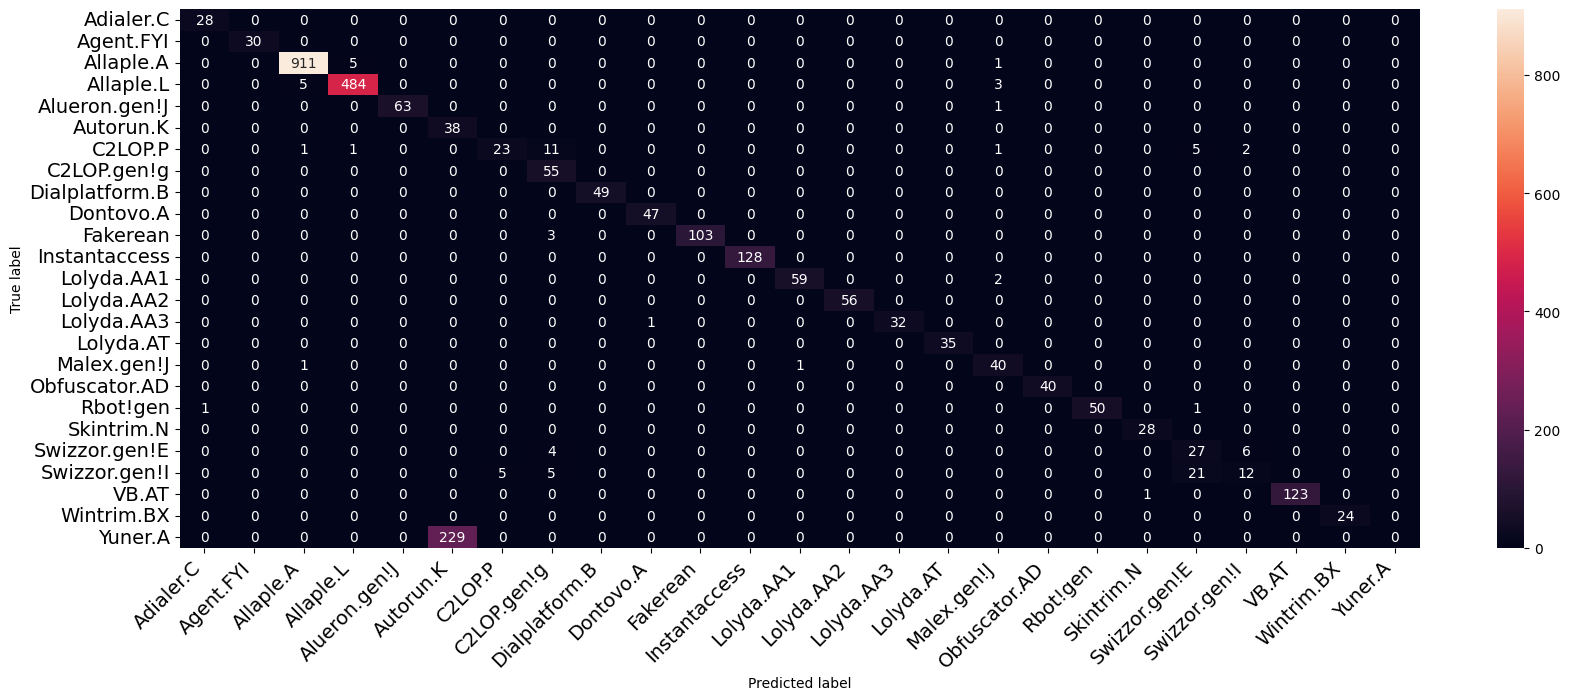

In [46]:
class_names= batches.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (20,7), fontsize=14)

Here is our confusion matrix. We can observe that although most of the malwares were well classified, **Autorun.K** is always mistaken for **Yuner.A**. This is probably due to the fact that we have very few samples of **Autorun.K** in our training set. Moreover, **Swizzor.gen!E** is often mistaken with **Swizzor.gen!l**, which can be explained by the fact that they come from really close famillies and thus could have similarities in their code.